# 4.모델 훈련(핸즈온 머신러닝)

## 4.1 선형회귀

### 4.1.1 정규방정식

#### 기초 데이터 세팅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

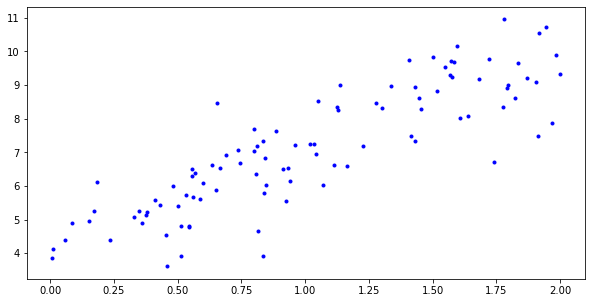

In [2]:
plt.figure(figsize = (10,5))

plt.plot(x, y, 'b.')

plt.show()

In [3]:
x.reshape(-1).shape

(100,)

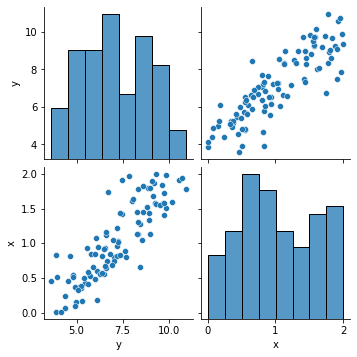

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'y' : y.reshape(-1), 'x' : x.reshape(-1)
}, index = range(0,100))


sns.pairplot(data)
plt.show()

#### 정규방정식 적용

In [5]:
x_b = np.c_[np.ones((100,1)), x] #x데이터에 b0을 추가해줌
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) #(t(x)**x)**t(x)**y

In [6]:
theta_best

array([[4.23099698],
       [2.83093089]])

실제로 나와야 하는 값은 y를 만들때 넣은 절편인 4와 기울기인 3! 
하지만 오차항 때문에 정확한 값은 얻지 못했다


In [7]:
np.array([[0], [2]])

array([[0],
       [2]])

In [8]:
np.ones((2,1))

array([[1.],
       [1.]])

#### 사이킷런 적용

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1),y)

LinearRegression()

In [10]:
lin_reg.intercept_

array([4.23099698])

## 4.2 Gradient Descent

In [11]:
x.shape

(100, 1)

In [12]:
x.reshape(-1,1).shape

(100, 1)

In [13]:
#경사하강법의 구현

eta = 0.1 #학습률(에타)
n_iterations = 1000
m = 100

#theta를 초기화
theta = np.random.randn(2,1)
print(theta)

#변수저장
beta0 = list()
beta1 = list()

for iteration in range(n_iterations) : 
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    beta0.append(theta[0][0])
    beta1.append(theta[1][0])

[[0.09856918]
 [1.30769805]]


In [14]:
theta[0][0]

4.23099697961317

In [15]:
#새로운 데이터 생성
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

#파라미터 저장
param = np.array([beta0, beta1])

#행렬곱 생성
sgd_0_1 = x_new_b.dot(param).T


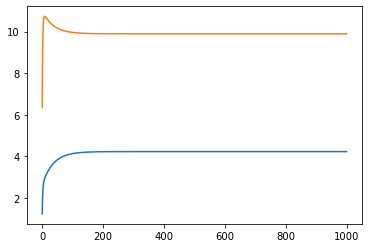

In [16]:
#파라미터가 어디로 수렵하는지 보자
plt.plot(figsize = (10,5))
plt.plot(sgd_0_1)
plt.show()

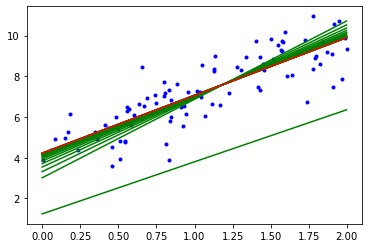

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

#그래프 그리기
plt.plot(figsize = (15,10))
plt.plot(x,y,'b.')
for i in range(0,200,10):
    plt.plot([0,max(x)],sgd_0_1[i],'g-')
    if i == 190 : 
        plt.plot([0,max(x)],sgd_0_1[i],'r-')

위와 같이 천천히 최적의 회귀선으로 다가가게 된다.

###  4.2.2 Stocastic Gradient Descent

> 매 스텝 샘플을 만들고 그 샘플에 대해 그레디언트를 계산한다

> 샘플 = 무작위성 이므로 배치 경사하강법보다 불안정하다

> 사실 딥러닝에서의 배치는 전체가 아니라 일부인데 왜 여기서는 반대로 사용되는지 잘 모르겠다.

> 초반에는 학습률을 크게 늘려 local minima에 빠지지 않게 하고, 이후에는 학습률을 작게 줄여서 global minima를 찾게 한다고 한다! 좋은 아이디어 인듯

In [25]:
n_epochs = 50 #반복 횟수를 의미한다.

t0, t1 = 5, 50 #학습 스케쥴 파라미터...?

m=100

def learning_schedule(t) : 
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs) : 
    for i in range(m) : #100개의 샘플로 진행한다.
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1] #이건 하나의 x를 뽑아주는 과정
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta -eta*gradients
        


In [26]:
theta

array([[4.18819806],
       [2.85550673]])

#### 사이킷 런에서도 구동이 가능하다

In [44]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
#tol은 tolerance?로 0.001보다 손실이 적게 줄어들때가지 반복실행하는 것 같다

sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [45]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23107671]), array([2.873791]))

## 4.3 다항회귀

간단한 데이터 셋 생성

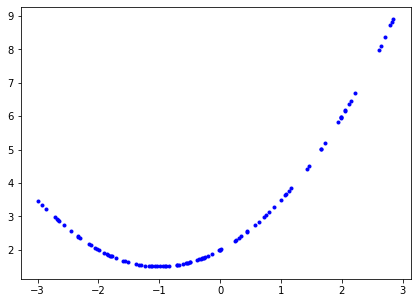

In [99]:
m=100
x = 6*np.random.rand(m,1) -3
y = 0.5*x**2 + x + 2 #+ np.random.randn(m,1) #마지막 항은 약간의 오차항이라고 한다

plt.figure(figsize = (7,5))
plt.plot(x,y,'b.')
plt.show()

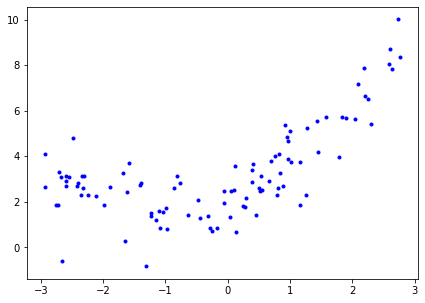

In [98]:
m=100
x = 6*np.random.rand(m,1) -3
y = 0.5*x**2 + x + 2 + np.random.randn(m,1) #마지막 항은 약간의 오차항이라고 한다

plt.figure(figsize = (7,5))
plt.plot(x,y,'b.')
plt.show()

확실히 오차항을 추가하니 차이가 존재한다.

- PolynomialFeatures 이용

In [101]:
from sklearn.preprocessing import PolynomialFeatures

#include bias를 사용하면 x0 = 1인 항이 추가된다.
poly_features=PolynomialFeatures(degree = 2, include_bias = False)

x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0]) #그 제곱값이 함께 들어가는 것 같다.

[-1.85952638]
[-1.85952638  3.45783836]


변수가 a,b이고 degree = 3으로 설정하게 될 경우 $$ ab, ab^2, a^2b$$도 추가된다고 한다

## 4.4 학습곡선

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y) : 
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(x_train)) : 
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize = (10,5))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label = 'validation set')
    plt.ylabel('RMSE')
    plt.legend()

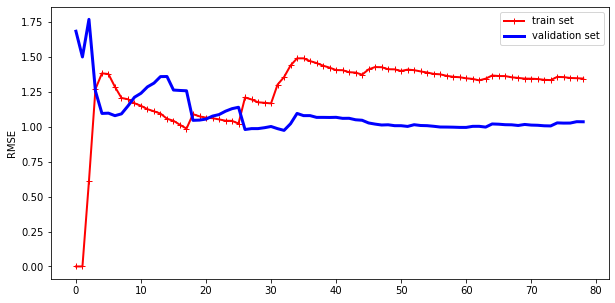

In [135]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

이제는 10차 다항식을 그려본다고 한다

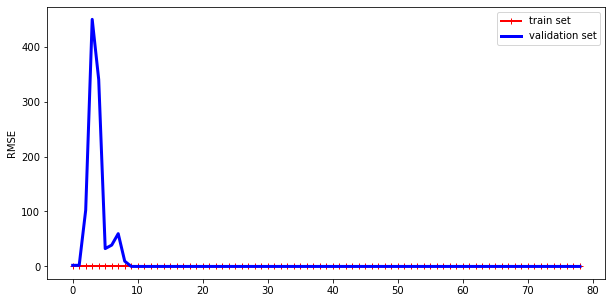

In [143]:
from sklearn.pipeline import Pipeline

#Pipeline에서 기억할 것은
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)
#근데 이렇게 하니까 이상하게 되는데,,,